Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<ipython-input-1-38519d15323f>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
row_data = pd.read_csv("mail_data.csv")

In [5]:
# show the first 5 rows
row_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# replace the null values
data = row_data.where((pd.notnull(row_data)),'')

In [9]:
# show the last 5 rows
row_data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
# show the num of row and columns
data.shape

(5572, 2)

In [11]:
# show the values of each targer 
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
# label encoding
data.loc[data['Category'] == 'spam','Category'] = 0
data.loc[data['Category'] == 'ham','Category'] = 1

In [51]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Splitting the data

In [15]:
X = data['Message']
Y = data['Category']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(5572,) (4457,) (1115,)


In [43]:
# extracting features
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
# make y int
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Model training

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluating Model

In [46]:
train_pred = model.predict(X_train_features)
acc = accuracy_score(train_pred,Y_train)
acc

0.9676912721561588

In [47]:
test_pred = model.predict(X_test_features)
acc = accuracy_score(test_pred,Y_test)
acc

0.9668161434977578

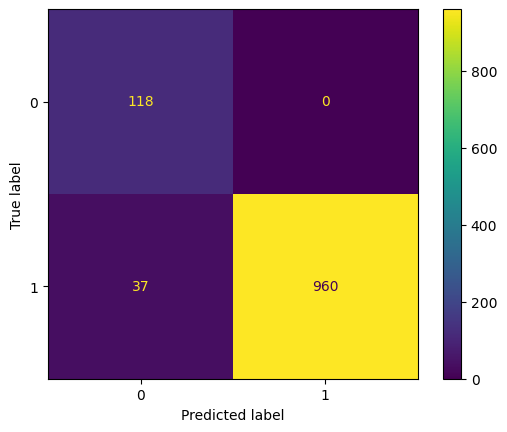

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = np.unique(np.concatenate([test_pred, Y_test]))
confusion_matrix = confusion_matrix(test_pred, Y_test, labels=labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =labels)
cm_display.plot()
plt.show()

Building a predictive system

In [50]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_featured = feature_extraction.transform(input_mail)
prediction = model.predict(input_featured)
print(prediction)
if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail
